
# Linear Regression with Python


In this notebook we'll create a Linear Regression model to predict housing prices for regions in the USA.
The model uses some features of a house and returns back an estimate of what the house would sell for.

data set: USA_Housing.csv.

The data contains the following columns:

* 'Avg. Area Income': Avg. Income of residents of the city house is located in.
* 'Avg. Area House Age': Avg Age of Houses in same city
* 'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city
* 'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city
* 'Area Population': Population of city house is located in
* 'Price': Price that the house sold at
* 'Address': Address for the house

### Import data analysis libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Check out the Data

In [10]:
df = pd.read_csv('USA_Housing.csv')

In [11]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


**We got a database with 5000 records and 7 columns. 5 coulmn can be used as features and the Price is the depended variable. There are no null values. We will not use the adress column for this analysis.**

In [13]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [14]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

# EDA

Let's create some simple plots to check out the data!

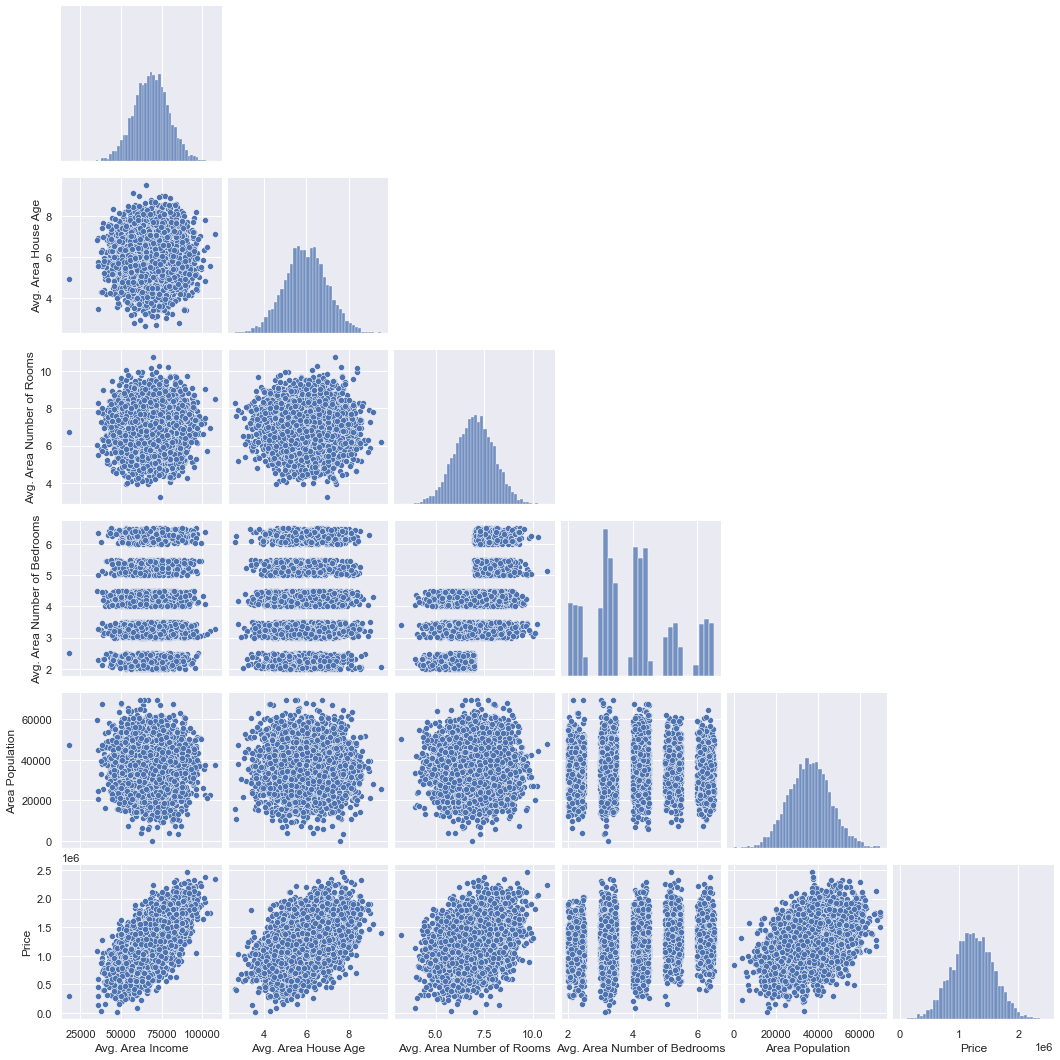

In [105]:
sns.pairplot(df, corner=True)

**The above pairplot shows scatterplots for each pair of parameters and histograms of each parameter in diagonal.**
* It seems that all parameters have some correleation with the Price. The strongest correlation is with *Avg. Area Income*.
* We can also see that there is no high molticollinearity between the features (a condition required for good regression model).
* all parameters have normal distributions. This is not suprising as this is actually a sample of averages and comply with the central limit thorem. (Avg. Area Number of Bedrooms has some gaps in the distribution but the ovarall shape is normal).

**The below heatmap shows the value R of the correlations.**

<AxesSubplot:>

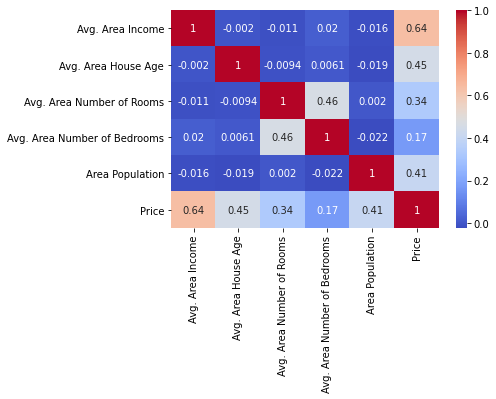

In [32]:
sns.heatmap(USAhousing.corr(), annot=True, cmap='coolwarm')

## Training a Linear Regression Model

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. We will toss out the Address column because it only has text info that the linear regression model can't use.

### X and y arrays

In [20]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [34]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = df['Price']

## Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [35]:
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 101)

## Creating and Training the Model

In [90]:
from sklearn.linear_model import LinearRegression

In [91]:
model = LinearRegression()

In [92]:
model.fit(X_train,y_train)

LinearRegression()

## Model Evaluation

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [95]:
# print the intercept
print(model.intercept_)

-2640159.79685191


In [96]:
coeff_df = pd.DataFrame(data=model.coef_, index=X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Area Income** is associated with an **increase of \$21.52 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area House Age** is associated with an **increase of \$164883.28 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Rooms** is associated with an **increase of \$122368.67 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Bedrooms** is associated with an **increase of \$2233.80 **.
- Holding all other features fixed, a 1 unit increase in **Area Population** is associated with an **increase of \$15.15 **.

### Model Evaluation
**We'll use the X_test subset to get predictions and evaluate the model performance**

In [100]:
y_pred = model.predict(X_test)

In [182]:
# Create a dataframe for validation (the original index of y_test is kept)
df_test = pd.DataFrame(data={'y_pred':y_pred, 'y_test':y_test})
df_test

,y_pred,y_test
1718,1.260961e+06,1.251689e+06
2511,8.275888e+05,8.730483e+05
345,1.742421e+06,1.696978e+06
2521,9.746254e+05,1.063964e+06
54,9.987178e+05,9.487883e+05
...,...,...
1776,1.515043e+06,1.489520e+06
4269,7.460118e+05,7.777336e+05
1661,3.721914e+05,1.515271e+05
2410,1.365217e+06,1.343824e+06


<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

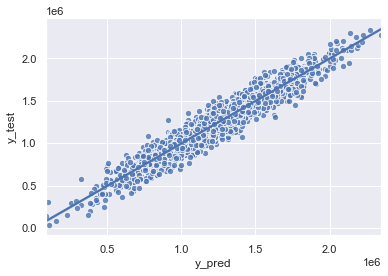

In [179]:
sns.regplot(data=df_test, x='y_pred', y='y_test', scatter_kws={"s": 40, "edgecolors":'white'})

We got a much better prediction model (R= 0.96) using all the numeric parameters!

In [153]:
df_test.corr()

,y_pred,y_test
y_pred,1.000000,0.958029
y_test,0.958029,1.000000


**Residual Histogram**

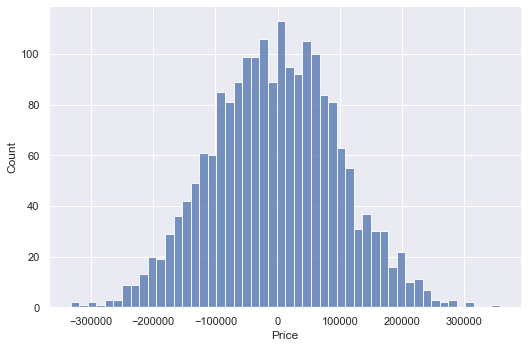

In [186]:
sns.displot((y_test-y_pred),bins=50, aspect=1.5)

We can see that the error (residual is normaly distriputed).

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [165]:
from sklearn import metrics

In [167]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 82288.22251914955
MSE: 10460958907.209503
RMSE: 102278.82922291153
